In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
data=pd.read_csv('heart-disease.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.shape

(303, 14)

In [6]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

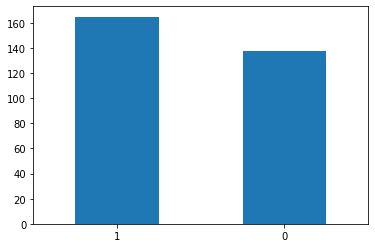

In [7]:
data['target'].value_counts().plot(kind="bar") 
plt.xticks(rotation=0)

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

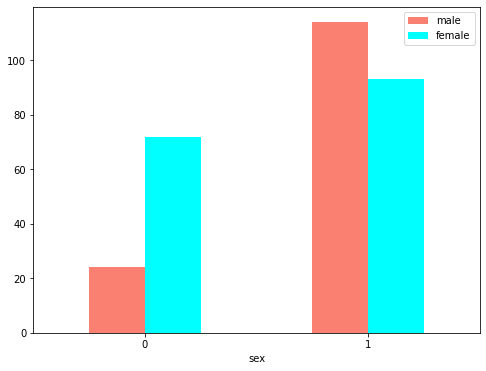

In [10]:
pd.crosstab(data.sex, data.target).plot(kind='bar',
                                        figsize=(8,6),
                                        color=['salmon','cyan'])

plt.legend(['male','female'])
plt.xticks(rotation=0)

Text(0.5, 0, 'age of patients')

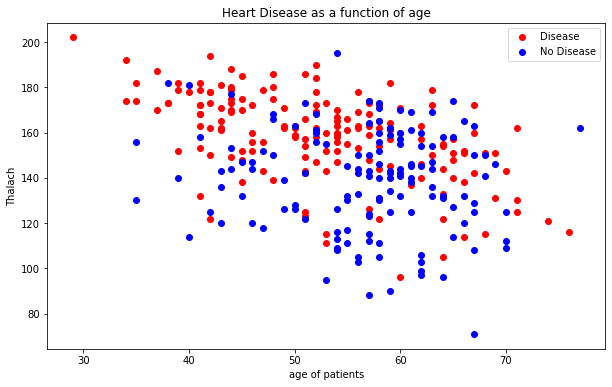

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
           color='red')
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            color = 'blue')

plt.legend(['Disease','No Disease']);
plt.ylabel("Thalach")
plt.title("Heart Disease as a function of age")
plt.xlabel("age of patients")


In [12]:
data.age[data.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

<AxesSubplot:ylabel='Frequency'>

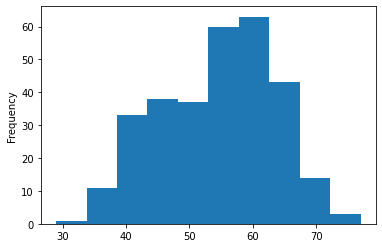

In [16]:
data.age.plot.hist()

In [20]:
corr_mat=data.corr()

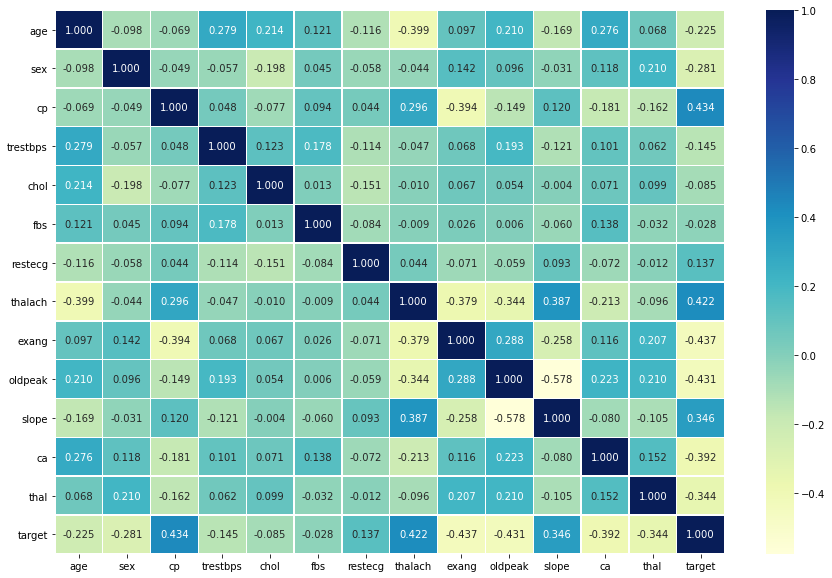

In [25]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat, annot=True, linewidths=0.4, cmap='YlGnBu', fmt='.3f')

In [90]:
    #Splitting data
    data.sample(frac=1)
   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0


In [91]:
 X=data.drop('target', axis=1)
Y=data['target']

In [92]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [52]:
#train_test-split
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [93]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [54]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [70]:
from sklearn import linear_model as lim
from sklearn import neighbors as nei
from sklearn.ensemble import RandomForestClassifier

In [94]:
models={"LogisticRegression":lim.LogisticRegression(),
         "KNN":nei.KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier(),
        "Ridge Classification":lim.RidgeClassifier()}

def scoreModel(models,train_x,test_x,train_y,test_y):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(train_x, train_y)
        model_scores[name]=model.score(test_x,test_y)
    return model_scores

    

In [95]:
model_scores=scoreModel(models,X_train,X_test,Y_train,Y_test)
model_scores

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Ridge Classification': 0.8688524590163934}

In [83]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])

<AxesSubplot:>

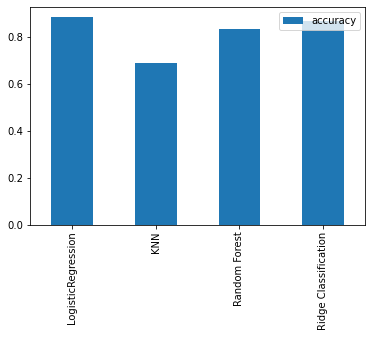

In [96]:
model_compare.T.plot.bar()

### Hyperparameter Tuning

In [133]:
#Tuning the Logistic regression
train_scores=[]
test_scores=[]
LR= lim.LogisticRegression()
qwe= range(50,500,5)
for i in qwe:
    LR.set_params( max_iter=i)
    LR.fit(X_train,Y_train)
    train_scores.append(LR.score(X_train,Y_train))
    test_scores.append(LR.score(X_test,Y_test))
train_scores
test_scores

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590

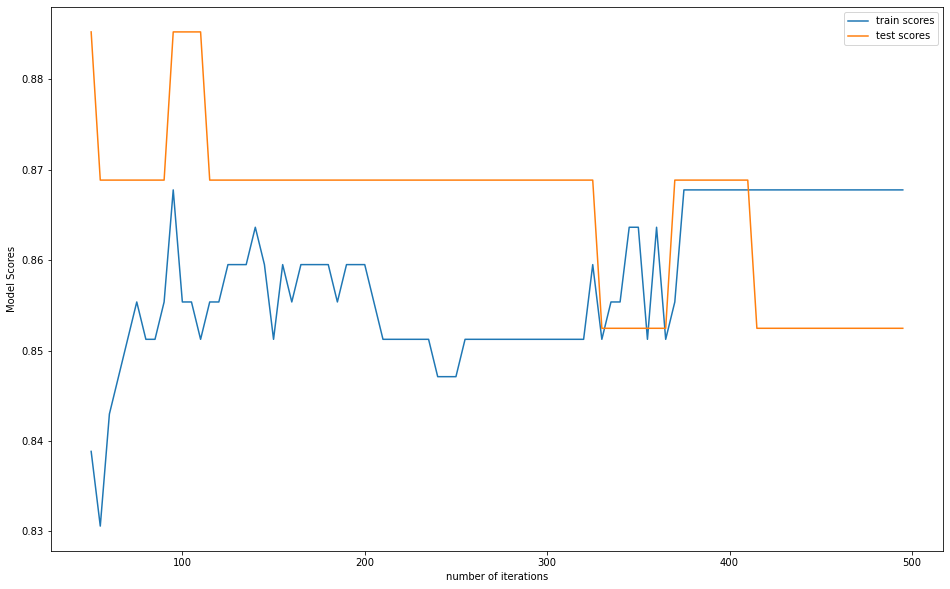

In [134]:
qwe= range(50,500,5)
fig, ax=plt.subplots(figsize=(16,10))
ax.plot(qwe, train_scores ,label="train scores")
ax.plot(qwe, test_scores ,label="test scores")
plt.xlabel('number of iterations')
plt.ylabel('Model Scores')
plt.legend()


### Using RandomizedSearchgrid

In [138]:
reg_grid={'C': np.logspace(-4,4,20),
          'solver': ['lbfgs']}

In [146]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
rsg=RandomizedSearchCV(lim.LogisticRegression(),
                      param_distributions=reg_grid,
                      cv=5,
                      n_iter=10,
                      verbose=True)
rsg.fit(X_train,Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs']},
                   verbose=True)

In [147]:
rsg.best_params_

{'solver': 'lbfgs', 'C': 0.23357214690901212}

In [148]:
rsg.score(X_test,Y_test)

0.8852459016393442

In [150]:
y_preds=rsg.predict(X_test)

In [151]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [157]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

Text(0, 0.5, 'original')

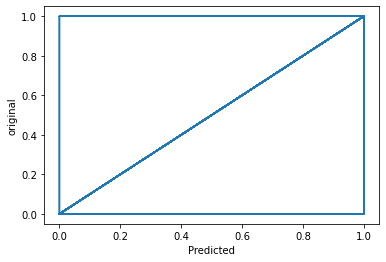

In [167]:
plt.plot(y_preds,Y_test, label="comparison",)
plt.xlabel("Predicted")
plt.ylabel("original")



In [198]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score,recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score as cvs

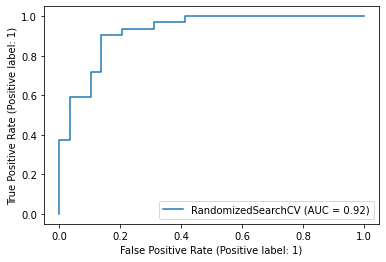

In [171]:
plot_roc_curve(rsg,X_test,Y_test)

In [172]:
#Confusion Matrix
confusion_matrix(y_preds,Y_test)

array([[25,  3],
       [ 4, 29]], dtype=int64)

In [173]:
conf_mat=pd.DataFrame(confusion_matrix(y_preds,Y_test))

In [174]:
conf_mat

,0,1
0,25,3
1,4,29


Text(33.0, 0.5, 'True Values')

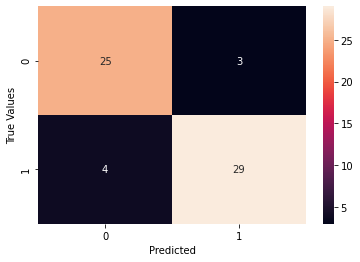

In [179]:
sns.heatmap(conf_mat,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Values")

In [195]:
print(classification_report(Y_test,y_preds,digits=3))

              precision    recall  f1-score   support

           0      0.893     0.862     0.877        29
           1      0.879     0.906     0.892        32

    accuracy                          0.885        61
   macro avg      0.886     0.884     0.885        61
weighted avg      0.885     0.885     0.885        61



In [197]:
rsg.best_params_



{'solver': 'lbfgs', 'C': 0.23357214690901212}

In [200]:
fineTunedModel=lim.LogisticRegression(C=0.23357214690901212, solver='lbfgs')

In [201]:
cross_v=cvs(fineTunedModel,
           X,
           Y,
           cv=5,
           scoring='accuracy')

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [202]:
cross_v

array([0.81967213, 0.90163934, 0.86885246, 0.86666667, 0.75      ])

In [205]:
cross_v_accu=np.mean(cross_v)

In [206]:
cross_v_accu

0.8413661202185793

In [208]:
cross_v=cvs(fineTunedModel,
           X,
           Y,
           cv=5,
           scoring='precision')
cross_v

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.775     , 0.88571429, 0.85714286, 0.85714286, 0.725     ])

In [209]:
cross_v_precis=np.mean(cross_v)

In [210]:
cross_v_precis

0.82

In [214]:
cross_v=cvs(fineTunedModel,
           X,
           Y,
           cv=5,
           scoring='recall')
cross_v
cross_v=np.mean(cross_v)
cross_v

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.9151515151515153

In [215]:
cross_v_rec=cross_v

In [216]:
cross_v=cvs(fineTunedModel,
           X,
           Y,
           cv=5,
           scoring='f1')
cross_v
cross_v=np.mean(cross_v)
cross_v

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.86406124093473

In [217]:
cross_v_f1=cross_v

In [218]:
cross_v_f1

0.86406124093473

In [221]:
cv_metrics=pd.DataFrame({'Acuuracy': cross_v_accu,
            "Precison": cross_v_precis,
           'Recall':cross_v_rec,
           'f1':cross_v_f1,},
           index=[0])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Acuuracy'),
  Text(1, 0, 'Precison'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'f1')])

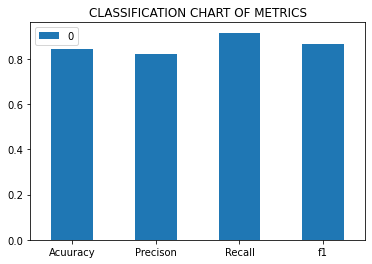

In [230]:
cv_metrics.T.plot.bar(title="CLASSIFICATION CHART OF METRICS")
plt.xticks(rotation=0)

In [235]:
fineTunedModel.fit(X_train,Y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.23357214690901212)

In [236]:
fineTunedModel.coef_

array([[ 0.0038679 , -0.89312639,  0.69285646, -0.01154198, -0.00156398,
         0.02245116,  0.3537007 ,  0.02467661, -0.63254888, -0.58136739,
         0.47375016, -0.64244103, -0.71696373]])

In [240]:
coef

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.003868,-0.893126,0.692856,-0.011542,-0.001564,0.022451,0.353701,0.024677,-0.632549,-0.581367,0.47375,-0.642441,-0.716964


In [242]:
feature_dict=dict(zip(data.columns,list(fineTunedModel.coef_[0])))

In [243]:
feature_dict

{'age': 0.003867899958512057,
 'sex': -0.8931263872152453,
 'cp': 0.6928564576508763,
 'trestbps': -0.011541981155276281,
 'chol': -0.0015639787378259574,
 'fbs': 0.02245116347127601,
 'restecg': 0.35370069949544836,
 'thalach': 0.024676613873813813,
 'exang': -0.632548877938533,
 'oldpeak': -0.5813673879206176,
 'slope': 0.4737501586525433,
 'ca': -0.6424410345199488,
 'thal': -0.7169637336022053}

In [244]:
coef=pd.DataFrame(feature_dict,index=[0])

In [245]:
coef

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003868,-0.893126,0.692856,-0.011542,-0.001564,0.022451,0.353701,0.024677,-0.632549,-0.581367,0.47375,-0.642441,-0.716964


<AxesSubplot:title={'center':'MOST IMPORTANT VARIABLE FEATURES'}>

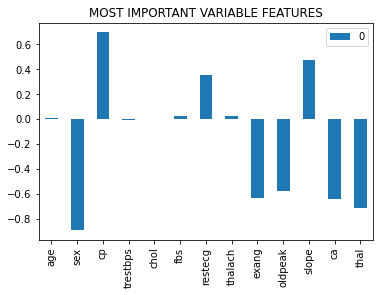

In [247]:
coef.T.plot.bar(title= "MOST IMPORTANT VARIABLE FEATURES")